# Keras Tensor Flow - Trilha 4: Tarefa (Peso 3)
###### Gabriel Elias Lima Silva

## Fraudes de Cartão de Crédito
- Endereço do executavel: Mackenzie/blob/main/Gabriel_Elias_KerasTensorFlow_Trilha4.ipynb
- Endereço do arquivo para download: https://www.kaggle.com/elvisacaciobarbosa/detec-o-de-fraude-no-cart-o-de-cr-dito/data

Esse trabalho tem como objetivo ajudar a entender as características de uma transação fraudulenta de cartão de crédito. Bem como prever através das características dessa transação, se essa é ou não uma fraude. O tema é 100% relevante pois trabalho no Santander e essa é uma oportunidade que eu tenho de entender academicamente como eu posso agregar valor na atividade que possuo hoje no Banco.

#### Importações e Configurações Iniciais

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pp

#### Importando a base

In [3]:
df = pd.read_csv('creditcard.csv')

#### Realizando Análise Exploratório - EDA | Aplicando tratamentos ao dataset

In [ ]:
pp.ProfileReport(df)

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# conhecendo a base
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#verificando estatistica da base
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
# verificando se existe valores nulos na base

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# verificando se existe duplicidades na base
df.duplicated().sum()

1081

In [11]:
# foi identificado duplicidades e ser tratadas
df.drop_duplicates(inplace=True)

In [12]:
# confirmando se ainda existe duplicidades na base
df.duplicated().sum()

0

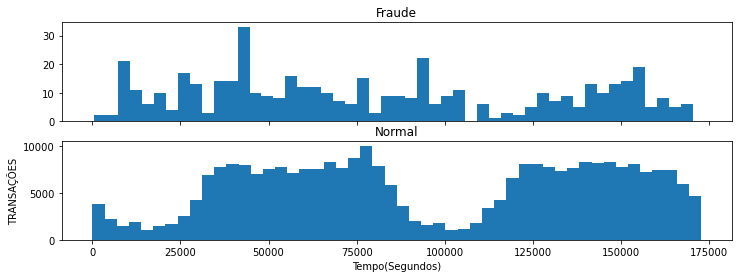

In [40]:
# Avaliando Distribução das classes
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraude')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Tempo(Segundos)')
plt.ylabel('TRANSAÇÕES')
plt.show()

#### Preparando os dados

In [15]:
# dividindo o target das demais features
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [16]:
X.shape

(283726, 30)

In [17]:
y.shape

(283726,)

In [18]:
from sklearn.preprocessing import scale
X = scale(X)
X

array([[-1.99682292, -0.70108232, -0.04168726, ...,  0.33303251,
        -0.06584955,  0.24419951],
       [-1.99682292,  0.60879165,  0.16413764, ..., -0.0271543 ,
         0.0432187 , -0.34258399],
       [-1.99680186, -0.7003364 , -0.81133678, ..., -0.14432548,
        -0.18382429,  1.15889967],
       ...,
       [ 1.64227757,  0.98235398, -0.18043304, ...,  0.00680174,
        -0.08264021, -0.0822395 ],
       [ 1.64227757, -0.12646526,  0.32465977, ...,  0.27052318,
         0.31700384, -0.31339058],
       [ 1.64236181, -0.27686005, -0.1127094 , ..., -0.01055821,
         0.03994074,  0.51329005]])

In [19]:
X.shape

(283726, 30)

In [20]:
#dividindo a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [21]:
#Instanciando o Modelo
model = keras.Sequential([
    layers.Dense(29, activation='sigmoid', input_shape=[30]),
    layers.Dense(1, activation='sigmoid',)
])


In [ ]:
# Sumarização do Modelo
model.summary()

In [23]:
#Instanciando o Modelo
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['binary_accuracy'],)

In [24]:
# Otimizando o modelo com Cross Entropy  
model.compile(loss='binary_crossentropy',
             metrics=['binary_accuracy'],run_eagerly=True)

In [25]:
# Treinamento do modelo
history = model.fit(X_train, y_train,
                    batch_size=32,
                    validation_split=0.3,
                    epochs=20,
                    verbose=1,
                   )

Epoch 1/20
4345/4345 [==============================] - 61s 14ms/step - loss: 0.0144 - binary_accuracy: 0.9986 - val_loss: 0.0048 - val_binary_accuracy: 0.9994
Epoch 2/20
4345/4345 [==============================] - 63s 14ms/step - loss: 0.0045 - binary_accuracy: 0.9994 - val_loss: 0.0058 - val_binary_accuracy: 0.9994
Epoch 3/20
4345/4345 [==============================] - 64s 15ms/step - loss: 0.0052 - binary_accuracy: 0.9994 - val_loss: 0.0067 - val_binary_accuracy: 0.9994
Epoch 4/20
4345/4345 [==============================] - 65s 15ms/step - loss: 0.0055 - binary_accuracy: 0.9994 - val_loss: 0.0063 - val_binary_accuracy: 0.9994055 - binary
Epoch 5/20
4345/4345 [==============================] - 64s 15ms/step - loss: 0.0050 - binary_accuracy: 0.9994 - val_loss: 0.0065 - val_binary_accuracy: 0.9994
Epoch 6/20
4345/4345 [==============================] - 65s 15ms/step - loss: 0.0051 - binary_accuracy: 0.9994 - val_loss: 0.0062 - val_binary_accuracy: 0.9994
Epoch 7/20
4345/4345 [======

In [26]:
# realizando as predições
y_pred = model.predict(X_test) 

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.014442,0.998583,0.004816,0.999379
1,0.004547,0.999396,0.005755,0.999379
2,0.005158,0.999396,0.006744,0.999379
3,0.005467,0.999403,0.006263,0.999379
4,0.005007,0.999403,0.006456,0.999379


Best Validation Loss: 0.0048
Best Validation Accuracy: 0.9994


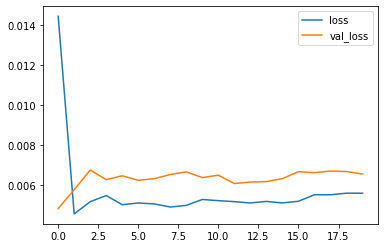

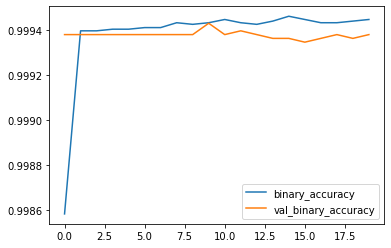

In [27]:
#  função para sumarizar resultados do modelo.
def display_hist(history):
    history_df = pd.DataFrame(history.history)
    display(history_df.head())
    # Start the plot at epoch 0
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()
    print(("Best Validation Loss: {:0.4f}" +\
    "\nBest Validation Accuracy: {:0.4f}")\
    .format(history_df['val_loss'].min(),
    history_df['val_binary_accuracy'].max()))
    return
display_hist(history)

Me incomoda o fato de que a acurácia se manteve enquanto o loss aumentou, ou seja, consumiu tempo e processamento para o resultado final ser pior do que o do inicio do treinamento. Entretando 99.94% de acurácia é um resultado excelente e suficiente para a resolução da maioria dos desafios da IA.